# Example code to present how pdinfo works

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
print('Current working directory: ' + os.getcwd())
print('Interpreter: ' + sys.executable)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '/Users/motti/Documents/GitHub/DataScience')
from pdinfo.src import pdinfo

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"                      # Force all prints in a cell to show

np.set_printoptions(precision=2)
np.set_printoptions(linewidth=100)
np.set_printoptions(suppress=True)

pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Current working directory: c:\Users\motti\Documents\GitHub\DataScience\pdinfo
Interpreter: c:\Users\motti\Documents\GitHub\DataScience\myvenv\Scripts\python.exe



1. df.inf.to_excel():

Excel file 'info.xlsx' created successfully.

2. df.inf.info():

Dataframe name:    df
Memory usage:      0.82 MB
Number of columns: 22
Number of rows:    2,938


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Country,object,0,0.00%,0,0.00%,-,-,-,193,-,-,-,-,-,-
1,Year,int64,0,0.00%,0,0.00%,"5,898,090.00","2,000.00","2,015.00",16,"2,008.00","2,012.00","2,014.00","2,015.00","2,015.00",0.00: Non-gaussian
2,Status,object,0,0.00%,0,0.00%,-,-,-,2,-,-,-,-,-,-
3,Life expectancy,float64,10,0.34%,0,0.00%,"202,690.60",36.30,89.00,362,72.10,75.70,79.70,82.00,86.73,1.00: Gaussian
4,Adult Mortality,float64,10,0.34%,0,0.00%,"482,524.00",1.00,723.00,425,144.00,228.00,336.00,398.30,583.84,1.00: Gaussian
5,infant deaths,int64,0,0.00%,848,28.86%,"89,033.00",0.00,"1,800.00",209,3.00,22.00,58.00,94.15,495.04,0.00: Non-gaussian
6,Alcohol,float64,194,6.60%,0,0.00%,"12,630.25",0.01,17.87,1076,3.75,7.70,10.76,11.96,13.48,1.00: Gaussian
7,percentage expenditure,float64,0,0.00%,611,20.80%,"2,168,982.31",0.00,"19,479.91",2328,64.91,441.53,"1,852.95","4,506.64","10,199.41",0.00: Non-gaussian
8,Hepatitis B,float64,553,18.82%,0,0.00%,"193,043.00",1.00,99.00,87,92.00,97.00,99.00,99.00,99.00,1.00: Gaussian
9,Measles,int64,0,0.00%,983,33.46%,"7,108,762.00",0.00,"212,183.00",958,17.00,360.25,"3,580.10","9,985.55","54,163.36",0.00: Non-gaussian



3. Filling missing values with mean value...

Dataframe name:    df
Memory usage:      0.82 MB
Number of columns: 22
Number of rows:    2,938


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Country,object,0,0.00%,0,0.00%,-,-,-,193,-,-,-,-,-,-
1,Year,int64,0,0.00%,0,0.00%,"5,898,090.00","2,000.00","2,015.00",16,"2,008.00","2,012.00","2,014.00","2,015.00","2,015.00",0.00: Non-gaussian
2,Status,object,0,0.00%,0,0.00%,-,-,-,2,-,-,-,-,-,-
3,Life expectancy,float64,0,0.00%,0,0.00%,"203,382.85",36.30,89.00,363,72.00,75.60,79.70,82.00,86.63,0.00: Non-gaussian
4,Adult Mortality,float64,0,0.00%,0,0.00%,"484,171.96",1.00,723.00,426,144.00,227.00,336.00,397.30,583.04,0.00: Non-gaussian
5,infant deaths,int64,0,0.00%,848,28.86%,"89,033.00",0.00,"1,800.00",209,3.00,22.00,58.00,94.15,495.04,0.00: Non-gaussian
6,Alcohol,float64,0,0.00%,0,0.00%,"13,523.20",0.01,17.87,1077,4.16,7.39,10.61,11.89,13.45,0.00: Non-gaussian
7,percentage expenditure,float64,0,0.00%,611,20.80%,"2,168,982.31",0.00,"19,479.91",2328,64.91,441.53,"1,852.95","4,506.64","10,199.41",0.00: Non-gaussian
8,Hepatitis B,float64,0,0.00%,0,0.00%,"237,803.08",1.00,99.00,88,87.00,96.00,98.00,99.00,99.00,0.00: Non-gaussian
9,Measles,int64,0,0.00%,983,33.46%,"7,108,762.00",0.00,"212,183.00",958,17.00,360.25,"3,580.10","9,985.55","54,163.36",0.00: Non-gaussian



4. df.inf.info() with features:



,Country,Status,Count,%,Cumulative Count,Cumulative %
0,Zimbabwe,Developing,16,0.54%,16,0.54%
1,Zambia,Developing,16,0.54%,32,1.09%
2,Yemen,Developing,16,0.54%,48,1.63%
3,Viet Nam,Developing,16,0.54%,64,2.18%
4,Venezuela (Bolivarian Republic of),Developing,16,0.54%,80,2.72%
5,Vanuatu,Developing,16,0.54%,96,3.27%
6,Uzbekistan,Developing,16,0.54%,112,3.81%
7,Uruguay,Developing,16,0.54%,128,4.36%
8,United States of America,Developed,16,0.54%,144,4.90%
9,United Republic of Tanzania,Developing,16,0.54%,160,5.45%



5. df.inf.inspect():


INSPECT DATAFRAME: df

Checking for duplicate rows:
- No duplicate rows found.

Checking for duplicate columns:
- No duplicate columns found.

Checking for missing values:
- No missing values found.

Checking for category columns with rare values (threshhold=0.05):
- No rare values found.

Checking for high correlation columns (threshhold=0.8):
- Found 3 columns with >= 0.8 correlation:
- 'under-five deaths ' is highly correlated with ['infant deaths']
- 'GDP' is highly correlated with ['percentage expenditure']
- ' thinness 5-9 years' is highly correlated with [' thinness  1-19 years']
None

6. df.inf.inspect_outliers():


INSPECT FOR OUTLIERS IN DATAFRAME: df


  0%|          | 0/20 [00:00<?, ?it/s]


Possible outliers:



,Feature,Negative Min?,Negative Value,Possible Outlier?,Outlier Value 0.99,Outlier Value Max,Outlier Multiplier,"IQR (0.75, 0.98)",Anomaly Info (0.005)
0,Adult Mortality,False,-,True,583.04,723.00,1.24,"-155.50-456.50 - -1,448.12-1,947.16",15 = 0.51% - 633.00-647.00
1,infant deaths,False,-,True,495.04,"1,800.00",3.64,-33.00-55.00 - -739.56-986.08,"14 = 0.48% - 957.00-1,000.00"
2,Alcohol,False,-,True,13.45,17.87,1.33,-8.35-16.84 - -39.01-52.03,15 = 0.51% - 14.27-14.44
3,percentage expenditure,False,-,True,"10,199.41","19,479.91",1.91,"-650.59-1,096.81 - -23,968.43-31,957.90","15 = 0.51% - 11,892.33-12,042.97"
4,Measles,False,-,True,"54,163.36","212,183.00",3.92,"-540.38-900.62 - -91,855.38-122,473.84","15 = 0.51% - 79,563.00-80,123.00"
5,BMI,False,-,True,72.06,87.30,1.21,-35.65-111.15 - -193.20-263.90,15 = 0.51% - 74.60-74.70
6,under-five deaths,False,-,True,767.82,"2,500.00",3.26,"-42.00-70.00 - -1,040.04-1,386.72","15 = 0.51% - 1,100.00-1,200.00"
7,Total expenditure,False,-,True,12.71,17.60,1.39,-0.07-11.77 - -29.17-42.20,15 = 0.51% - 14.39-14.55
8,HIV/AIDS,False,-,True,29.28,50.60,1.73,-0.95-1.85 - -56.76-75.91,15 = 0.51% - 34.80-36.70
9,GDP,False,-,True,"62,233.87","119,172.74",1.91,"-9,773.52-17,837.17 - -156,523.87-208,785.07","15 = 0.51% - 75,716.35-82,967.37"



7. df.inf.plot_corr_heatmap():



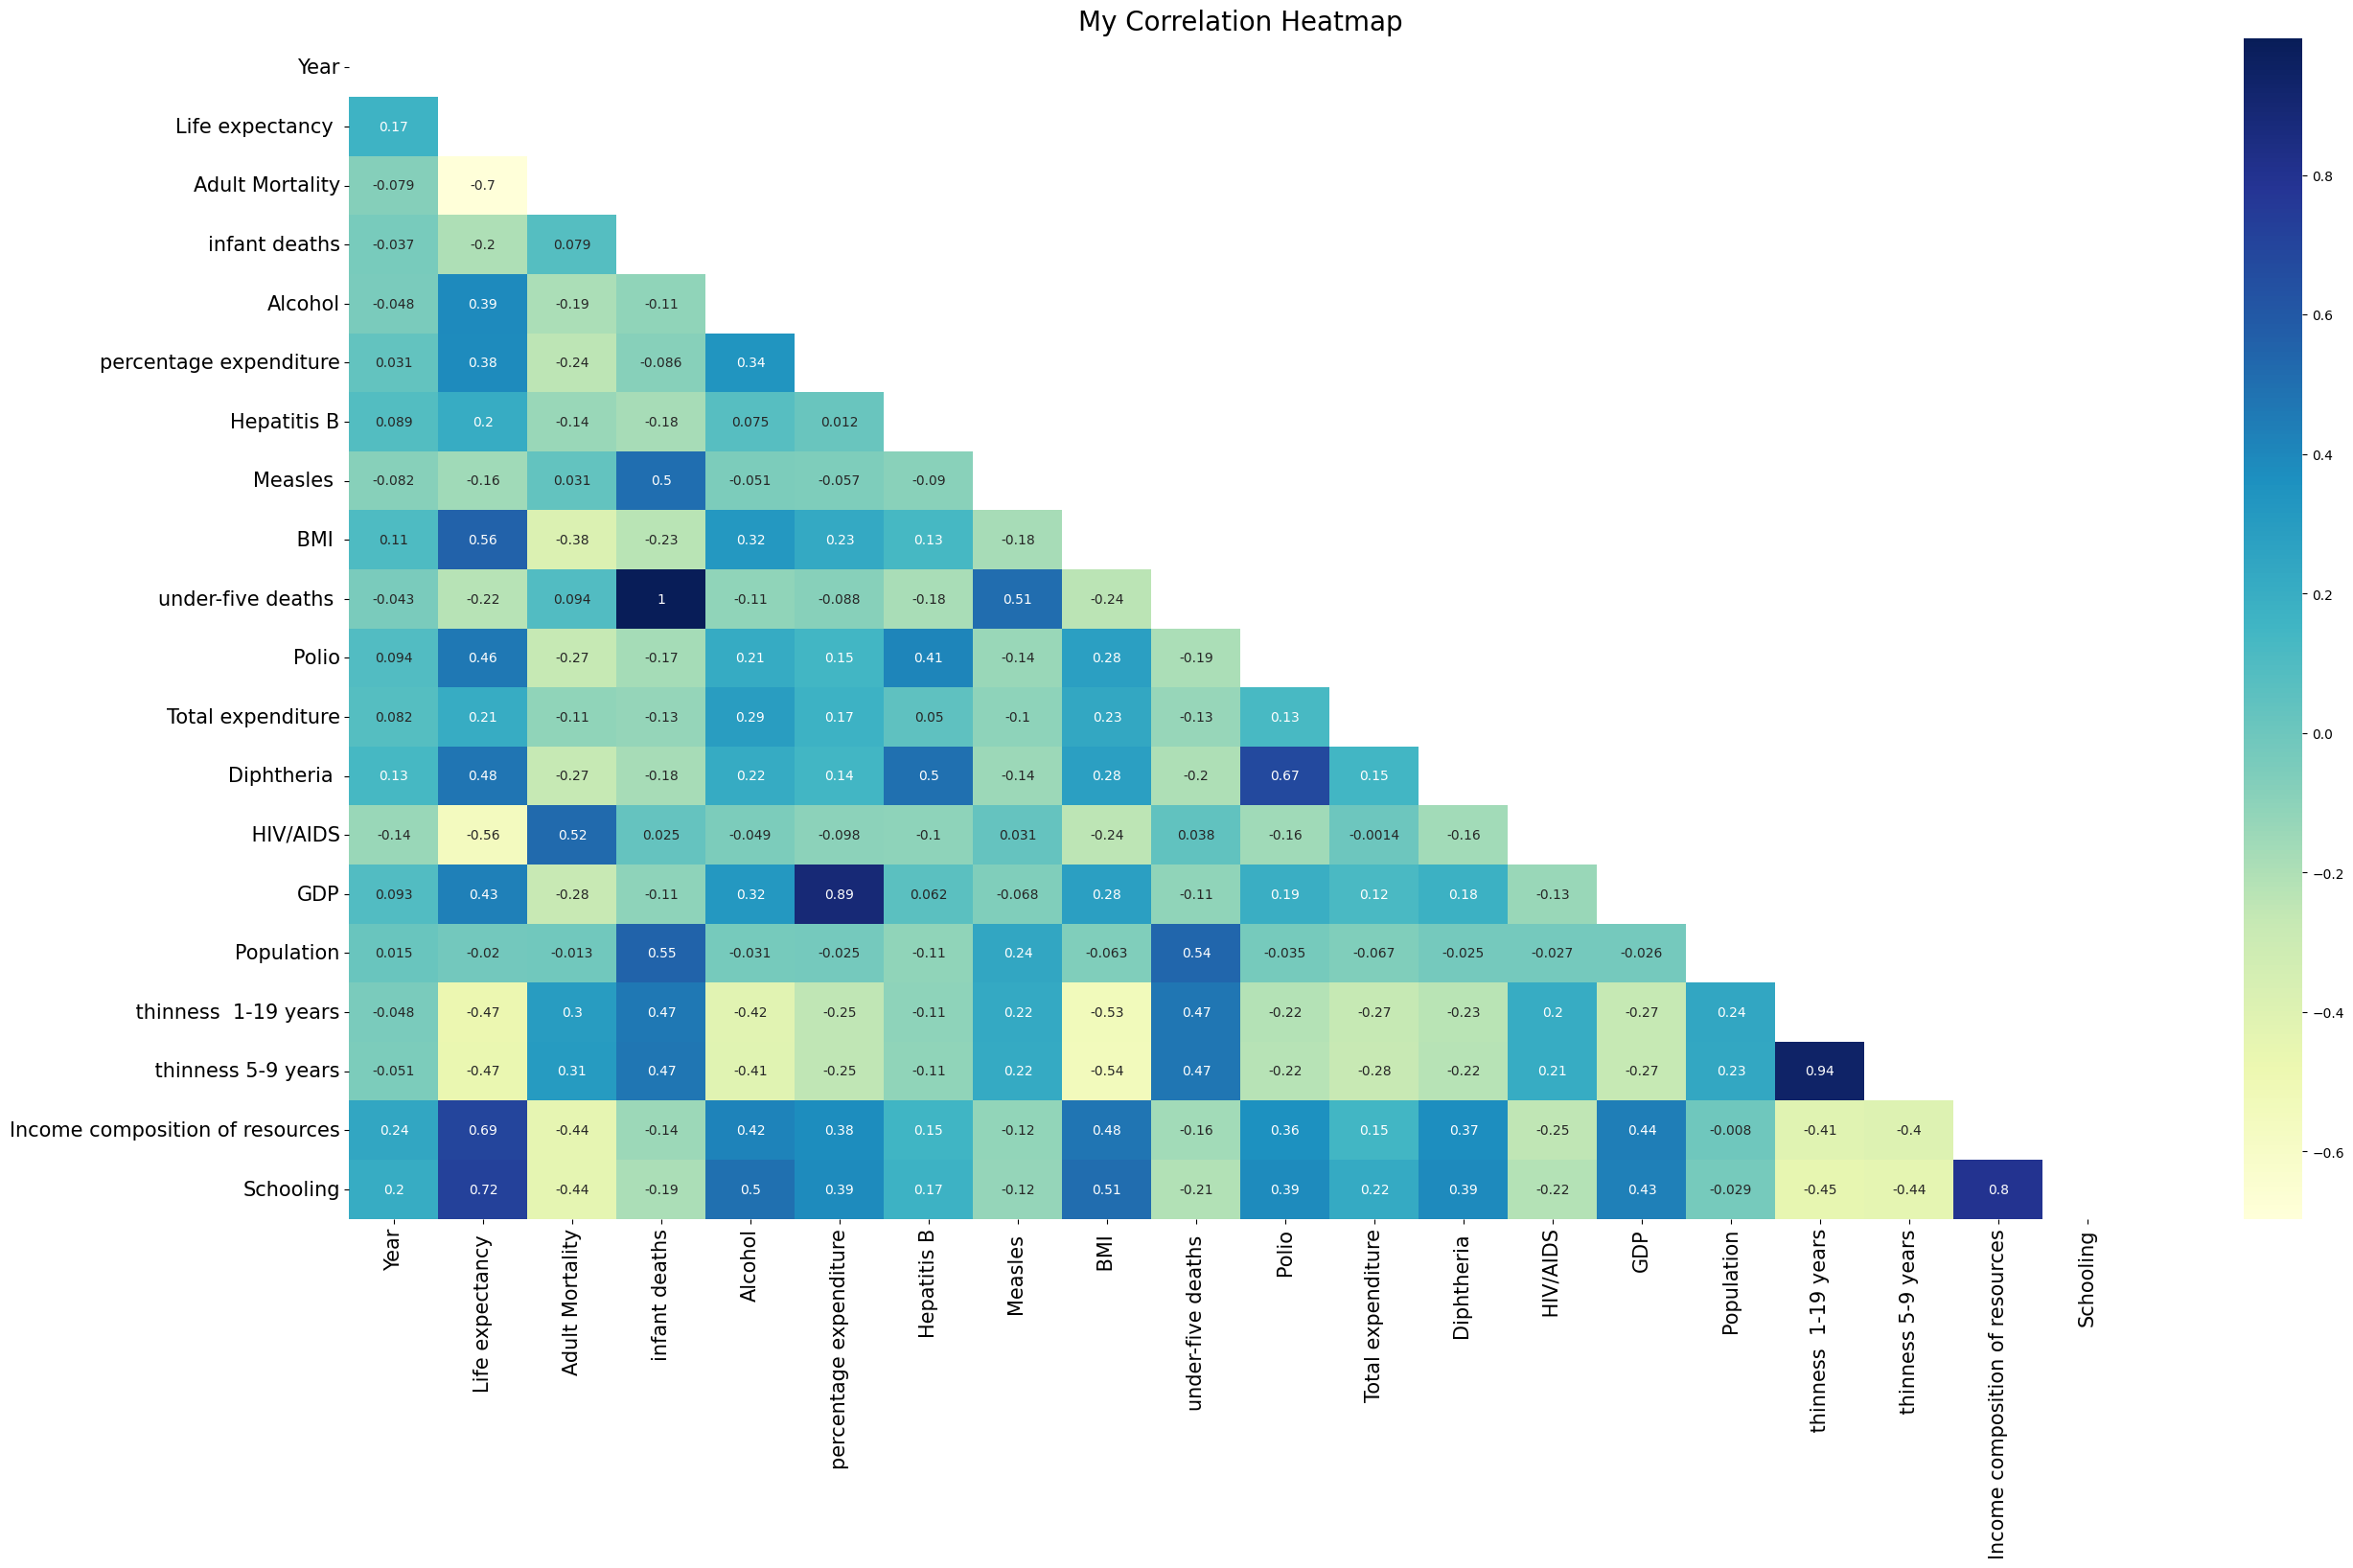

In [5]:
file = 'SampleData/Life Expectancy Data.csv'
df_data = pd.read_csv(file)
#print('Shape: ', df_data.shape)

def do_info(df):

    print('\n1. df.inf.to_excel():')
    print('='*45 + '\n')
    df.inf.to_excel()

    print('\n2. df.inf.info():')
    print('='*45 + '\n')
    p = [0.5, 0.75, 0.90, 0.95, 0.99]
    result = df.inf.info(percentiles=p, style=True)
    display(result)

    # Data includes missing values. Fill with mean value
    print('\n3. Filling missing values with mean value...')
    print('='*45 + '\n')
    df = df.inf.fillna_numeric_cols_with_value(type='mean')
    result = df.inf.info(percentiles=p, style=True)
    display(result)

    print('\n4. df.inf.info() with features:')
    print('='*45 + '\n')
    result = df.inf.info(['Country', 'Status'], cum_limit=50, style=True)
    display(result)

    print('\n5. df.inf.inspect():')
    print('='*45 + '\n')
    result = df.inf.inspect()
    print(result)

    print('\n6. df.inf.inspect_outliers():')
    print('='*45 + '\n')
    result = df.inf.inspect_outliers(contamination=0.005)
    display(result)

    print('\n7. df.inf.plot_corr_heatmap():')
    print('='*45 + '\n')
    df.inf.plot_corr_heatmap('My Correlation Heatmap')


do_info(df_data)


Shape:  (2938, 22)

EXAMPLE: df.inf.info():

Dataframe name:    df_data
Memory usage:      0.82 MB
Number of columns: 22
Number of rows:    2,938


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Country,object,0,0.00,0,0.00,None,None,None,193,-,-,-,-,-,-
1,Year,int64,0,0.00,0,0.00,5898090,2000,2015,16,"2,008.00","2,012.00","2,014.00","2,015.00","2,015.00",0.00: Non-gaussian
2,Status,object,0,0.00,0,0.00,None,None,None,2,-,-,-,-,-,-
3,Life expectancy,float64,10,0.34,0,0.00,202690.60,36.30,89.00,362,72.10,75.70,79.70,82.00,86.73,1.00: Gaussian
4,Adult Mortality,float64,10,0.34,0,0.00,482524.00,1.00,723.00,425,144.00,228.00,336.00,398.30,583.84,1.00: Gaussian
5,infant deaths,int64,0,0.00,848,28.86,89033,0,1800,209,3.00,22.00,58.00,94.15,495.04,0.00: Non-gaussian
6,Alcohol,float64,194,6.60,0,0.00,12630.25,0.01,17.87,1076,3.75,7.70,10.76,11.96,13.48,1.00: Gaussian
7,percentage expenditure,float64,0,0.00,611,20.80,2168982.31,0.00,19479.91,2328,64.91,441.53,"1,852.95","4,506.64","10,199.41",0.00: Non-gaussian
8,Hepatitis B,float64,553,18.82,0,0.00,193043.00,1.00,99.00,87,92.00,97.00,99.00,99.00,99.00,1.00: Gaussian
9,Measles,int64,0,0.00,983,33.46,7108762,0,212183,958,17.00,360.25,"3,580.10","9,985.55","54,163.36",0.00: Non-gaussian


Filling missing values with mean value...
Dataframe name:    df_data
Memory usage:      0.82 MB
Number of columns: 22
Number of rows:    2,938


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Country,object,0,0.00,0,0.00,None,None,None,193,-,-,-,-,-,-
1,Year,int64,0,0.00,0,0.00,5898090,2000,2015,16,"2,008.00","2,012.00","2,014.00","2,015.00","2,015.00",0.00: Non-gaussian
2,Status,object,0,0.00,0,0.00,None,None,None,2,-,-,-,-,-,-
3,Life expectancy,float64,0,0.00,0,0.00,203382.85,36.30,89.00,363,72.00,75.60,79.70,82.00,86.63,0.00: Non-gaussian
4,Adult Mortality,float64,0,0.00,0,0.00,484171.96,1.00,723.00,426,144.00,227.00,336.00,397.30,583.04,0.00: Non-gaussian
5,infant deaths,int64,0,0.00,848,28.86,89033,0,1800,209,3.00,22.00,58.00,94.15,495.04,0.00: Non-gaussian
6,Alcohol,float64,0,0.00,0,0.00,13523.20,0.01,17.87,1077,4.16,7.39,10.61,11.89,13.45,0.00: Non-gaussian
7,percentage expenditure,float64,0,0.00,611,20.80,2168982.31,0.00,19479.91,2328,64.91,441.53,"1,852.95","4,506.64","10,199.41",0.00: Non-gaussian
8,Hepatitis B,float64,0,0.00,0,0.00,237803.08,1.00,99.00,88,87.00,96.00,98.00,99.00,99.00,0.00: Non-gaussian
9,Measles,int64,0,0.00,983,33.46,7108762,0,212183,958,17.00,360.25,"3,580.10","9,985.55","54,163.36",0.00: Non-gaussian



EXAMPLE: df.inf.info() with features:



,Country,Status,Count,%,Cumulative Count,Cumulative %
0,Zimbabwe,Developing,16.00,0.54,16.00,0.54
1,Zambia,Developing,16.00,0.54,32.00,1.09
2,Yemen,Developing,16.00,0.54,48.00,1.63
3,Viet Nam,Developing,16.00,0.54,64.00,2.18
4,Venezuela (Bolivarian Republic of),Developing,16.00,0.54,80.00,2.72
5,Vanuatu,Developing,16.00,0.54,96.00,3.27
6,Uzbekistan,Developing,16.00,0.54,112.00,3.81
7,Uruguay,Developing,16.00,0.54,128.00,4.36
8,United States of America,Developed,16.00,0.54,144.00,4.90
9,United Republic of Tanzania,Developing,16.00,0.54,160.00,5.45



EXAMPLE: df.inf.inspect():


INSPECT DATAFRAME: df_data

Checking for duplicate rows:
- No duplicate rows found.

Checking for duplicate columns:
- No duplicate columns found.

Checking for missing values:
- No missing values found.

Checking for category columns with rare values (threshhold=0.05):
- No rare values found.

Checking for high correlation columns (threshhold=0.8):
- Found 3 columns with >= 0.8 correlation:
- 'under-five deaths ' is highly correlated with ['infant deaths']
- 'GDP' is highly correlated with ['percentage expenditure']
- ' thinness 5-9 years' is highly correlated with [' thinness  1-19 years']

EXAMPLE: df.inf.inspect_outliers():


INSPECT FOR OUTLIERS IN DATAFRAME: df_data


  0%|          | 0/20 [00:00<?, ?it/s]


Possible outliers:



,Feature,Negative Min?,Negative Value,Possible Outlier?,Outlier Value 0.99,Outlier Value Max,Outlier Multiplier,"IQR (0.75, 0.98)",Anomaly Info (0.005)
0,Adult Mortality,False,-,True,583.04,723.00,1.24,"-155.50-456.50 - -1,448.12-1,947.16",15 = 0.51% - 633.00-647.00
1,infant deaths,False,-,True,495.04,"1,800.00",3.64,-33.00-55.00 - -739.56-986.08,"14 = 0.48% - 957.00-1,000.00"
2,Alcohol,False,-,True,13.45,17.87,1.33,-8.35-16.84 - -39.01-52.03,15 = 0.51% - 14.27-14.44
3,percentage expenditure,False,-,True,"10,199.41","19,479.91",1.91,"-650.59-1,096.81 - -23,968.43-31,957.90","15 = 0.51% - 11,892.33-12,042.97"
4,Measles,False,-,True,"54,163.36","212,183.00",3.92,"-540.38-900.62 - -91,855.38-122,473.84","15 = 0.51% - 79,563.00-80,123.00"
5,BMI,False,-,True,72.06,87.30,1.21,-35.65-111.15 - -193.20-263.90,15 = 0.51% - 74.60-74.70
6,under-five deaths,False,-,True,767.82,"2,500.00",3.26,"-42.00-70.00 - -1,040.04-1,386.72","15 = 0.51% - 1,100.00-1,200.00"
7,Total expenditure,False,-,True,12.71,17.60,1.39,-0.07-11.77 - -29.17-42.20,15 = 0.51% - 14.39-14.55
8,HIV/AIDS,False,-,True,29.28,50.60,1.73,-0.95-1.85 - -56.76-75.91,15 = 0.51% - 34.80-36.70
9,GDP,False,-,True,"62,233.87","119,172.74",1.91,"-9,773.52-17,837.17 - -156,523.87-208,785.07","15 = 0.51% - 75,716.35-82,967.37"



EXAMPLE: df.inf.plot_corr_heatmap():



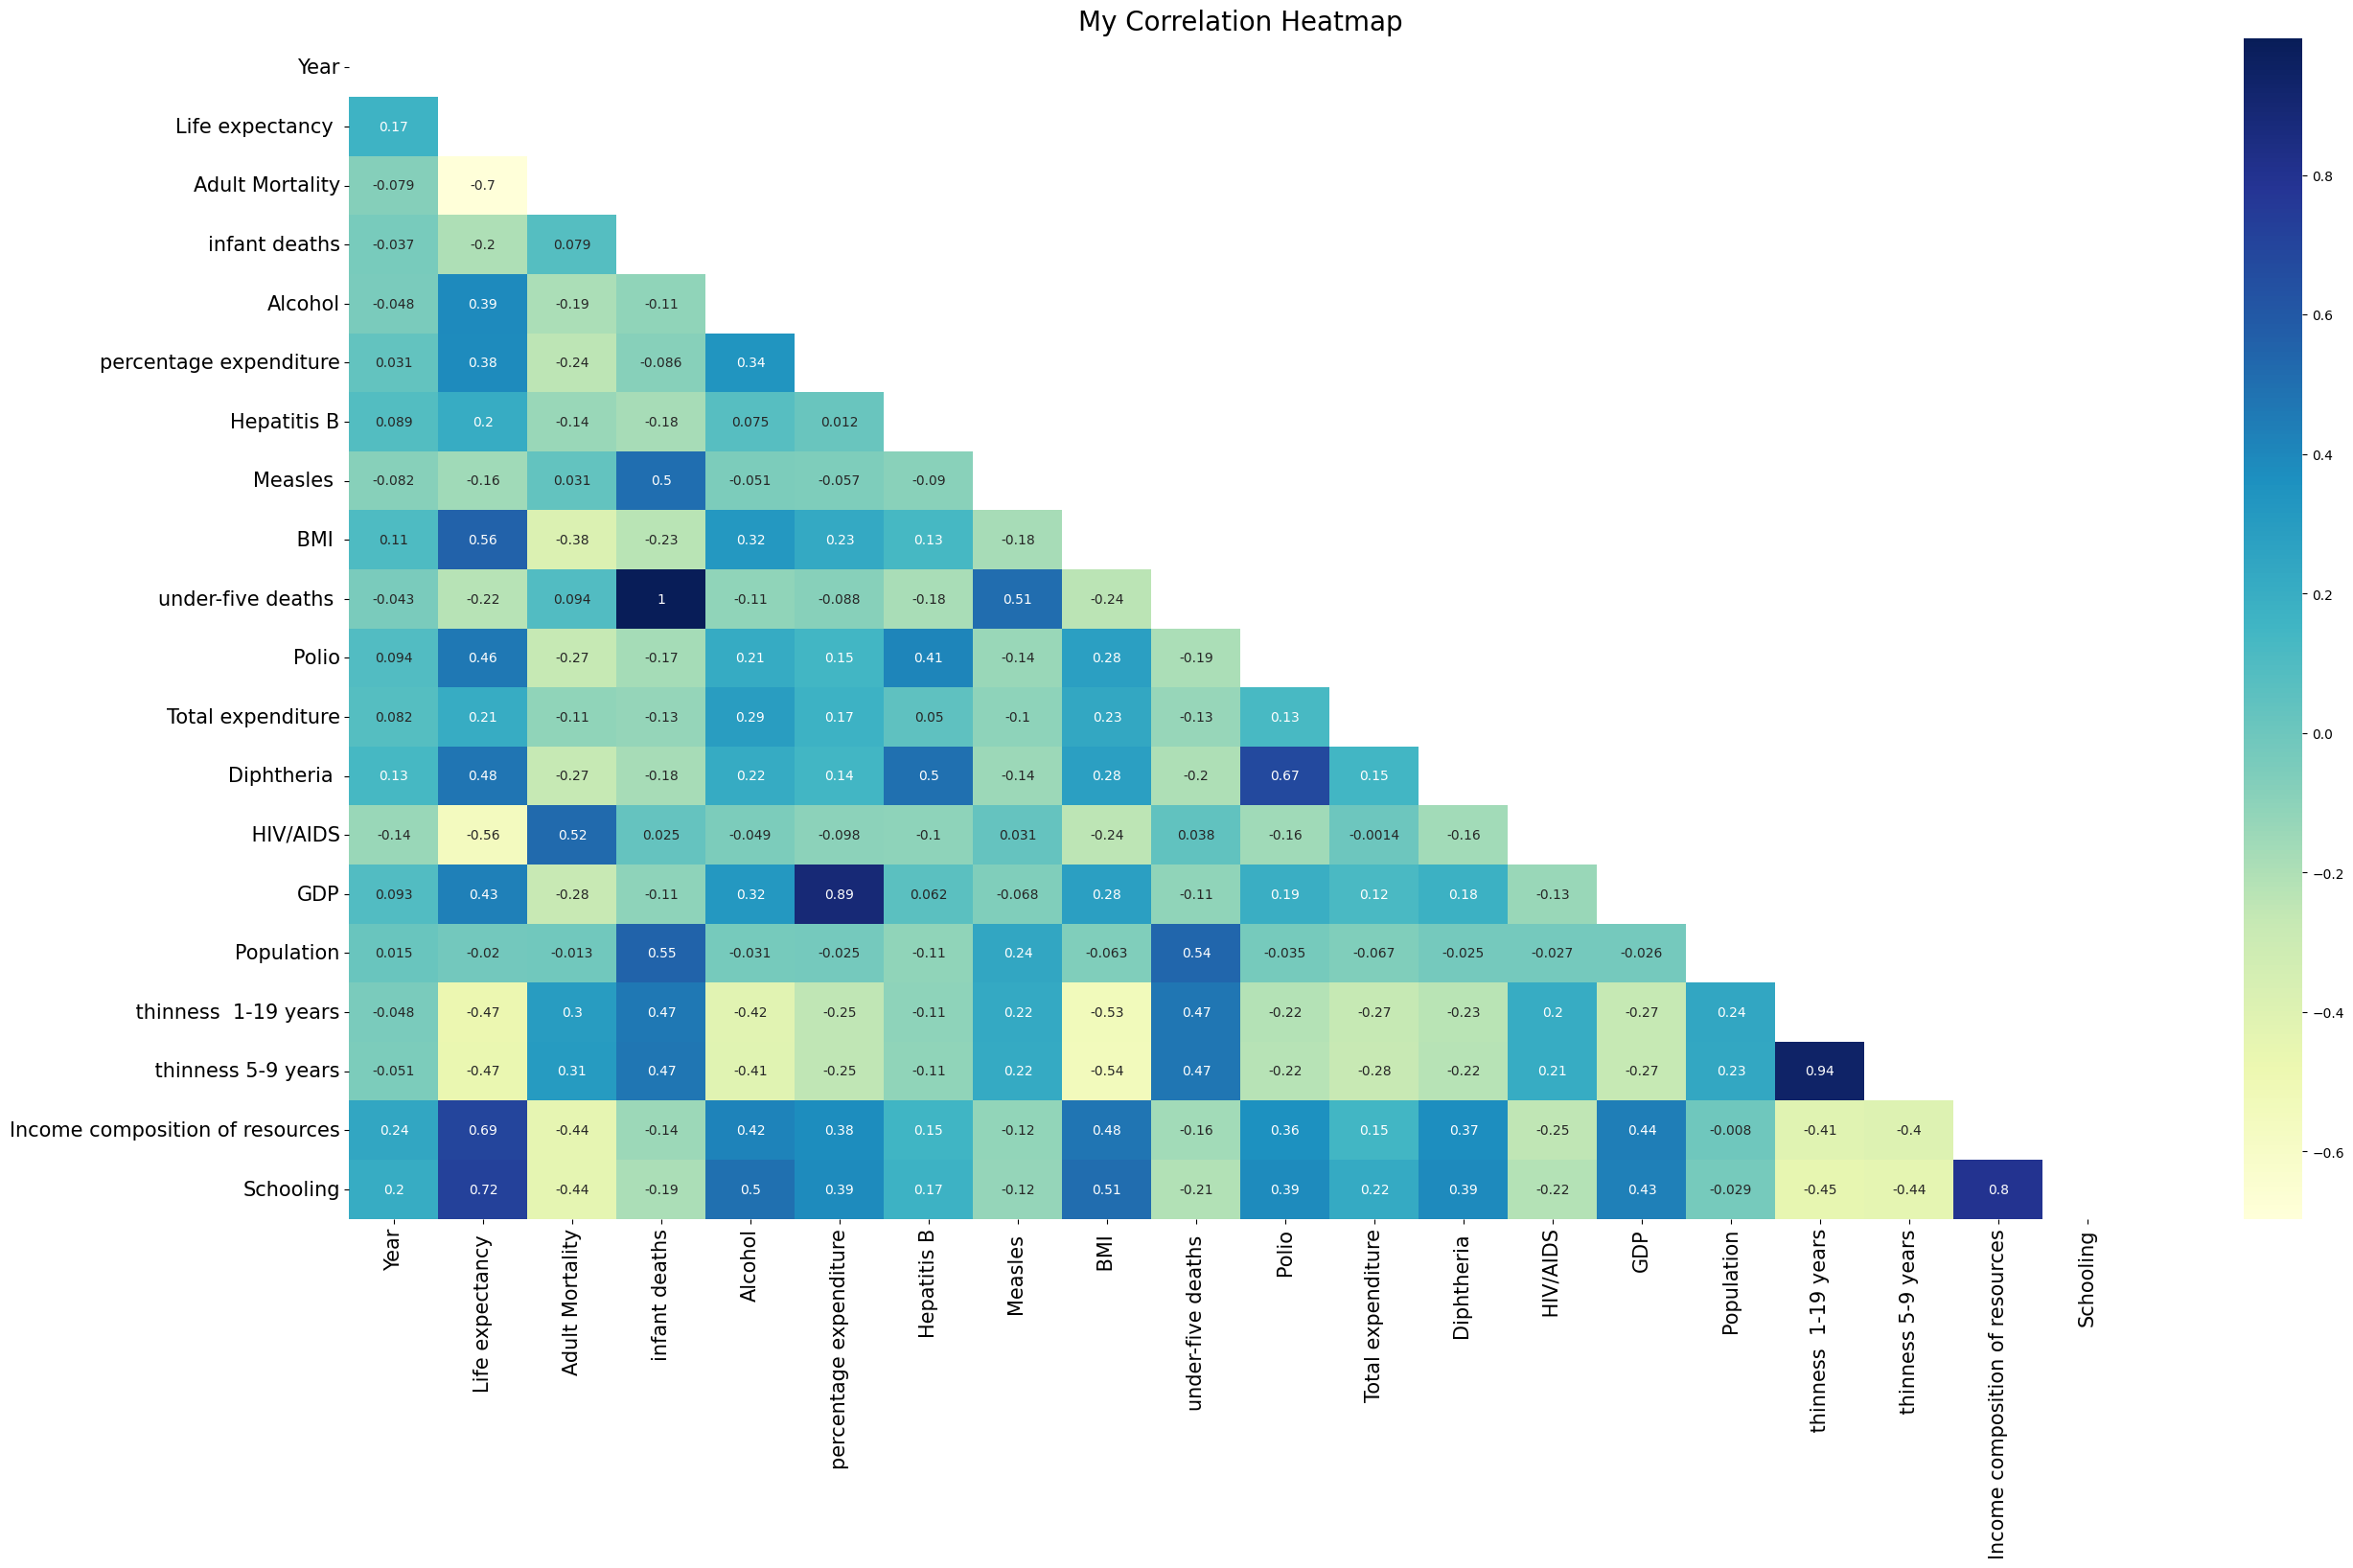

In [6]:
file = 'SampleData/Life Expectancy Data.csv'
df_data = pd.read_csv(file)
print('Shape: ', df_data.shape)

print('\nEXAMPLE: df.inf.info():')
print('='*45 + '\n')
p = [0.5, 0.75, 0.90, 0.95, 0.99]
df_data.inf.info(percentiles=p)

# Data includes missing values. Fill with mean value
print('Filling missing values with mean value...')
df_data = df_data.inf.fillna_numeric_cols_with_value(type='mean')
df_data.inf.info(percentiles=p)

print('\nEXAMPLE: df.inf.info() with features:')
print('='*45 + '\n')
df_data.inf.info(['Country', 'Status'], cum_limit=70)

print('\nEXAMPLE: df.inf.inspect():')
print('='*45 + '\n')
df_data.inf.inspect()

print('\nEXAMPLE: df.inf.inspect_outliers():')
print('='*45 + '\n')
df_data.inf.inspect_outliers(contamination=0.005)

print('\nEXAMPLE: df.inf.plot_corr_heatmap():')
print('='*45 + '\n')
df_data.inf.plot_corr_heatmap('My Correlation Heatmap')


Shape:  (19735, 29)

EXAMPLE: df.inf.info():

Dataframe name:    df
Memory usage:      5.65 MB
Number of columns: 29
Number of rows:    19,735


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,date,object,0,0.00,0,0.00,None,None,None,19735,-,-,-,-,-,-
1,Appliances,int64,0,0.00,0,0.00,1928010,10,1080,92,60.00,100.00,196.00,330.00,576.60,0.00: Non-gaussian
2,lights,int64,0,0.00,15252,77.28,75030,0,70,8,0.00,0.00,20.00,20.00,30.00,0.00: Non-gaussian
3,T1,float64,0,0.00,0,0.00,427984.49,16.79,26.26,722,21.60,22.60,23.96,24.73,25.50,0.00: Non-gaussian
4,RH_1,float64,0,0.00,0,0.00,794525.95,27.02,63.36,2547,39.66,43.07,45.70,47.33,50.49,0.00: Non-gaussian
5,T2,float64,0,0.00,0,0.00,401433.97,16.10,29.86,1650,20.00,21.50,23.33,24.56,26.95,0.00: Non-gaussian
6,RH_2,float64,0,0.00,0,0.00,797697.00,20.46,56.03,3376,40.50,43.26,45.23,46.66,49.79,0.00: Non-gaussian
7,T3,float64,0,0.00,0,0.00,439451.30,17.20,29.24,1426,22.10,23.29,25.10,26.20,27.13,0.00: Non-gaussian
8,RH_3,float64,0,0.00,0,0.00,774450.74,28.77,50.16,2618,38.53,41.76,44.36,45.09,46.50,0.00: Non-gaussian
9,T4,float64,0,0.00,0,0.00,411580.03,15.10,26.20,1390,20.67,22.10,23.79,24.50,25.60,0.00: Non-gaussian



EXAMPLE: df.inf.info() with features:



,Appliances,lights,Count,%,Cumulative Count,Cumulative %
0,50.00,0.00,3995.00,20.24,3995.00,20.24
1,60.00,0.00,2663.00,13.49,6658.00,33.74
2,40.00,0.00,1814.00,9.19,8472.00,42.93
3,70.00,0.00,1093.00,5.54,9565.00,48.47
4,80.00,0.00,876.00,4.44,10441.00,52.91
5,90.00,0.00,684.00,3.47,11125.00,56.37
6,30.00,0.00,658.00,3.33,11783.00,59.71
7,100.00,0.00,632.00,3.20,12415.00,62.91
8,110.00,0.00,454.00,2.30,12869.00,65.21
9,20.00,0.00,326.00,1.65,13195.00,66.86



EXAMPLE: df.inf.inspect():


INSPECT DATAFRAME: df

Checking for duplicate rows:
- No duplicate rows found.

Checking for duplicate columns:
- No duplicate columns found.

Checking for missing values:
- No missing values found.

Checking for category columns with rare values (threshhold=0.05):
- No rare values found.

Checking for high correlation columns (threshhold=0.8):
- Found 15 columns with >= 0.8 correlation:
- 'T2' is highly correlated with ['T1']
- 'T3' is highly correlated with ['T1']
- 'RH_3' is highly correlated with ['RH_1']
- 'T4' is highly correlated with ['T1', 'T3']
- 'RH_4' is highly correlated with ['RH_1', 'RH_3']
- 'T5' is highly correlated with ['T1', 'T3', 'T4']
- 'T6' is highly correlated with ['T2']
- 'T7' is highly correlated with ['T1', 'T3', 'T4', 'T5']
- 'RH_7' is highly correlated with ['RH_1', 'RH_3', 'RH_4']
- 'T8' is highly correlated with ['T1', 'T5', 'T7']
- 'RH_8' is highly correlated with ['RH_3', 'RH_4', 'RH_7']
- 'T9' is highly correlated with ['

  0%|          | 0/28 [00:00<?, ?it/s]


Possible outliers:



,Feature,Negative Min?,Negative Value,Possible Outlier?,Outlier Value 0.99,Outlier Value Max,Outlier Multiplier,"IQR (0.75, 0.98)",Anomaly Info (0.005)
0,Appliances,False,-,True,576.60,"1,080.00",1.87,"-25.00-175.00 - -1,230.00-1,710.00",89 = 0.45% - 660.00-670.00
1,lights,False,-,True,30.00,70.00,2.33,0.00-0.00 - -90.00-120.00,88 = 0.45% - 30.00-40.00
2,RH_1,False,-,True,50.49,63.36,1.25,28.73-51.67 - -12.22-94.49,94 = 0.48% - 52.63-52.66
3,T2,False,-,True,26.95,29.86,1.11,14.72-25.57 - -11.14-54.03,99 = 0.50% - 27.57-27.60
4,RH_2,False,-,True,49.79,56.03,1.13,29.86-51.30 - -20.13-100.32,95 = 0.48% - 53.25-53.35
5,RH_5,False,-,True,85.59,96.32,1.13,33.01-66.06 - -86.08-206.43,94 = 0.48% - 88.53-88.58
6,T6,True,-6.07,True,25.15,28.29,1.12,-7.82-22.70 - -83.92-104.42,99 = 0.50% - 26.50-26.53
7,RH_7,False,-,True,46.40,51.40,1.11,20.25-50.25 - -31.71-103.30,99 = 0.50% - 48.48-48.53
8,T_out,True,-5.00,True,22.50,26.10,1.16,-6.45-20.52 - -71.55-90.19,98 = 0.50% - 23.70-23.75
9,Windspeed,False,-,True,10.94,14.00,1.28,-3.25-10.75 - -26.00-37.00,93 = 0.47% - 11.67-11.83



EXAMPLE: df.inf.plot_corr_heatmap():



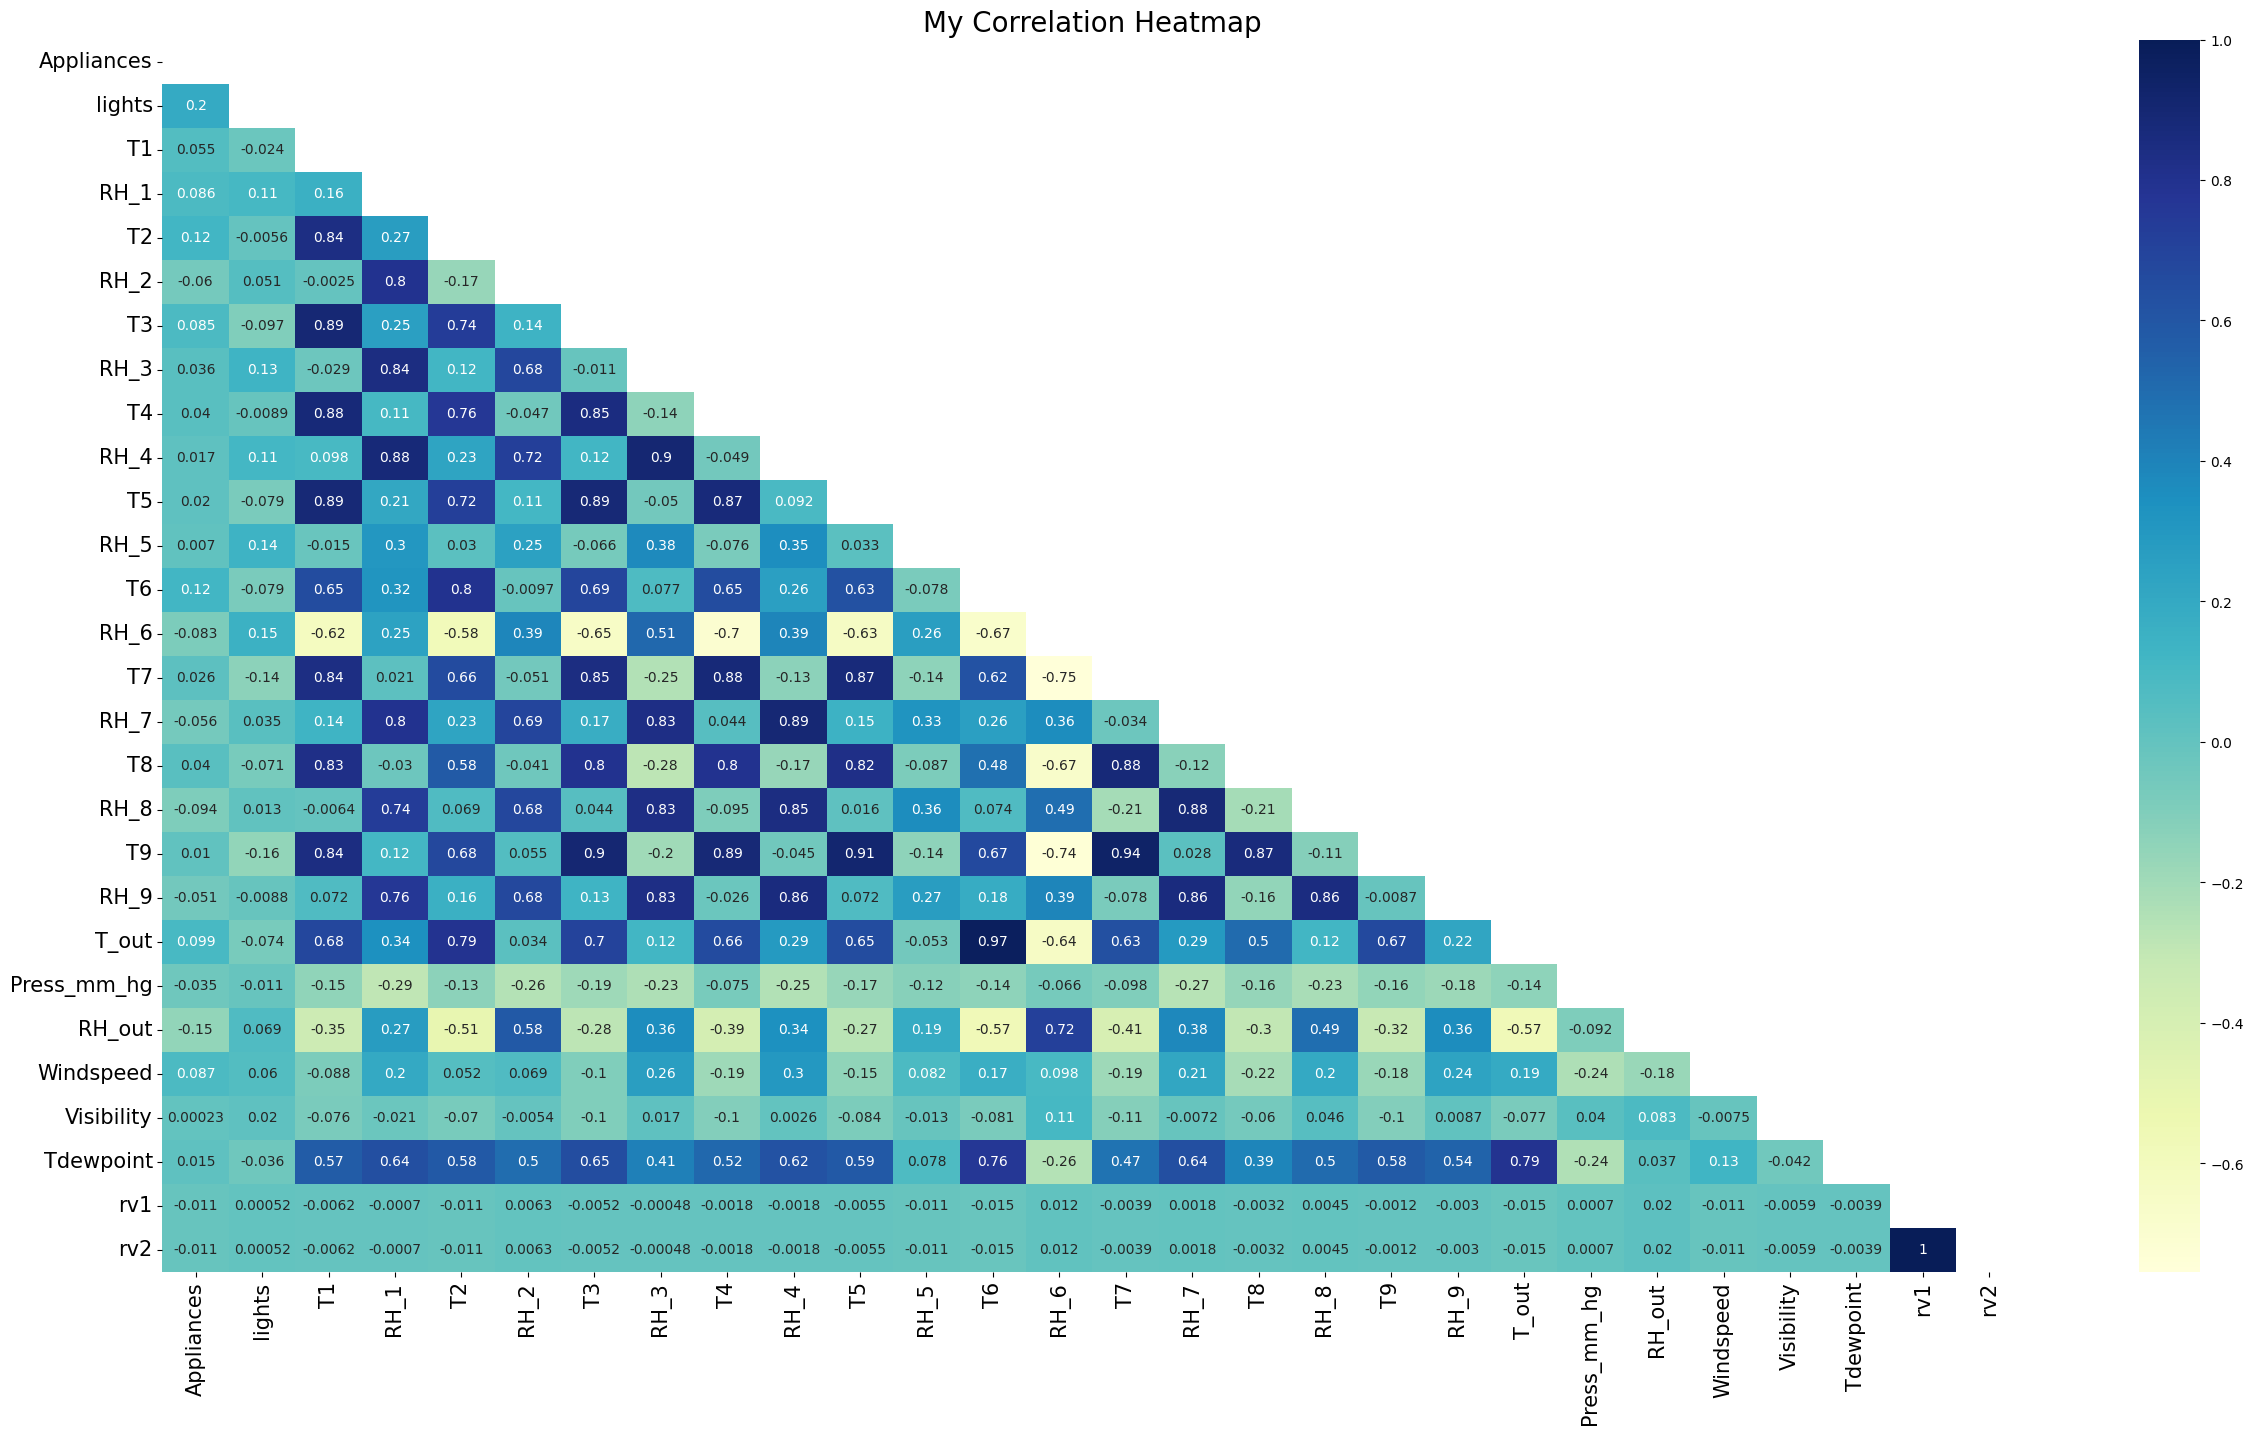

In [8]:
data = 'SampleData/energydata_complete.csv'
df = pd.read_csv(data)
print('Shape: ', df.shape)

print('\nEXAMPLE: df.inf.info():')
print('='*45 + '\n')
p = [0.5, 0.75, 0.90, 0.95, 0.99]
df.inf.info(percentiles=p)

print('\nEXAMPLE: df.inf.info() with features:')
print('='*45 + '\n')
df.inf.info(['Appliances', 'lights'], cum_limit=95)

print('\nEXAMPLE: df.inf.inspect():')
print('='*45 + '\n')
df.inf.inspect()

print('\nEXAMPLE: df.inf.inspect_outliers():')
print('='*45 + '\n')
df.inf.inspect_outliers(contamination=0.005)

print('\nEXAMPLE: df.inf.plot_corr_heatmap():')
print('='*45 + '\n')
df.inf.plot_corr_heatmap('My Correlation Heatmap')


Shape:  (8523, 12)

EXAMPLE: df.inf.info():

Dataframe name:    df
Memory usage:      3.96 MB
Number of columns: 12
Number of rows:    8,523


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Item_Identifier,object,0,0.00,0,0.00,None,None,None,1559,-,-,-,-,-,-
1,Item_Weight,float64,1463,17.17,0,0.00,90774.97,4.55,21.35,415,12.60,16.85,19.35,20.25,20.85,1.00: Gaussian
2,Item_Fat_Content,object,0,0.00,0,0.00,None,None,None,5,-,-,-,-,-,-
3,Item_Visibility,float64,0,0.00,526,6.17,563.64,0.00,0.33,7880,0.05,0.09,0.14,0.16,0.23,0.00: Non-gaussian
4,Item_Type,object,0,0.00,0,0.00,None,None,None,16,-,-,-,-,-,-
5,Item_MRP,float64,0,0.00,0,0.00,1201681.48,31.29,266.89,5938,143.01,185.64,231.20,250.77,263.02,0.00: Non-gaussian
6,Outlet_Identifier,object,0,0.00,0,0.00,None,None,None,10,-,-,-,-,-,-
7,Outlet_Establishment_Year,int64,0,0.00,0,0.00,17027521,1985,2009,9,"1,999.00","2,004.00","2,009.00","2,009.00","2,009.00",0.00: Non-gaussian
8,Outlet_Size,object,2410,28.28,0,0.00,None,None,None,3,-,-,-,-,-,-
9,Outlet_Location_Type,object,0,0.00,0,0.00,None,None,None,3,-,-,-,-,-,-


Filling missing values with mean value...
Dataframe name:    df
Memory usage:      3.96 MB
Number of columns: 12
Number of rows:    8,523


,Column,Type,Missing,Missing %,Zeros,Zeros %,Sum,Min,Max,Unique,50%,75%,90%,95%,99%,p-value
0,Item_Identifier,object,0,0.00,0,0.00,None,None,None,1559,-,-,-,-,-,-
1,Item_Weight,float64,0,0.00,0,0.00,109585.71,4.55,21.35,416,12.86,16.00,19.10,20.19,20.85,0.00: Non-gaussian
2,Item_Fat_Content,object,0,0.00,0,0.00,None,None,None,5,-,-,-,-,-,-
3,Item_Visibility,float64,0,0.00,526,6.17,563.64,0.00,0.33,7880,0.05,0.09,0.14,0.16,0.23,0.00: Non-gaussian
4,Item_Type,object,0,0.00,0,0.00,None,None,None,16,-,-,-,-,-,-
5,Item_MRP,float64,0,0.00,0,0.00,1201681.48,31.29,266.89,5938,143.01,185.64,231.20,250.77,263.02,0.00: Non-gaussian
6,Outlet_Identifier,object,0,0.00,0,0.00,None,None,None,10,-,-,-,-,-,-
7,Outlet_Establishment_Year,int64,0,0.00,0,0.00,17027521,1985,2009,9,"1,999.00","2,004.00","2,009.00","2,009.00","2,009.00",0.00: Non-gaussian
8,Outlet_Size,object,2410,28.28,0,0.00,None,None,None,3,-,-,-,-,-,-
9,Outlet_Location_Type,object,0,0.00,0,0.00,None,None,None,3,-,-,-,-,-,-



EXAMPLE: df.inf.info() with features:



,Item_Type,Item_Fat_Content,Count,%,Cumulative Count,Cumulative %
0,Household,Low Fat,840,9.86,840,9.86
1,Snack Foods,Low Fat,645,7.57,1485,17.42
2,Fruits and Vegetables,Low Fat,580,6.81,2065,24.23
3,Fruits and Vegetables,Regular,577,6.77,2642,31.00
4,Snack Foods,Regular,485,5.69,3127,36.69
5,Health and Hygiene,Low Fat,481,5.64,3608,42.33
6,Frozen Foods,Low Fat,424,4.97,4032,47.31
7,Frozen Foods,Regular,387,4.54,4419,51.85
8,Dairy,Low Fat,382,4.48,4801,56.33
9,Soft Drinks,Low Fat,339,3.98,5140,60.31



EXAMPLE: df.inf.inspect():


INSPECT DATAFRAME: df

Checking for duplicate rows:
- No duplicate rows found.

Checking for duplicate columns:
- No duplicate columns found.

Checking for missing values:
- Found 1 columns with missing values.

Checking for category columns with rare values (threshhold=0.05):
- No rare values found.

Checking for high correlation columns (threshhold=0.8):
- Dataframe has no highly correlated columns.

EXAMPLE: df.inf.inspect_outliers():


INSPECT FOR OUTLIERS IN DATAFRAME: df


  0%|          | 0/5 [00:00<?, ?it/s]


Possible outliers:



,Feature,Negative Min?,Negative Value,Possible Outlier?,Outlier Value 0.99,Outlier Value Max,Outlier Multiplier,"IQR (0.75, 0.98)",Anomaly Info (0.005)
0,Item_Visibility,False,-,True,0.23,0.33,1.45,-0.07-0.20 - -0.56-0.75,43 = 0.50% - 0.27-0.27
1,Item_Outlet_Sales,False,-,True,"7,366.01","13,086.96",1.78,"-2,566.33-6,501.87 - -19,409.59-26,148.90","43 = 0.50% - 8,217.30-8,239.94"



EXAMPLE: df.inf.plot_corr_heatmap():



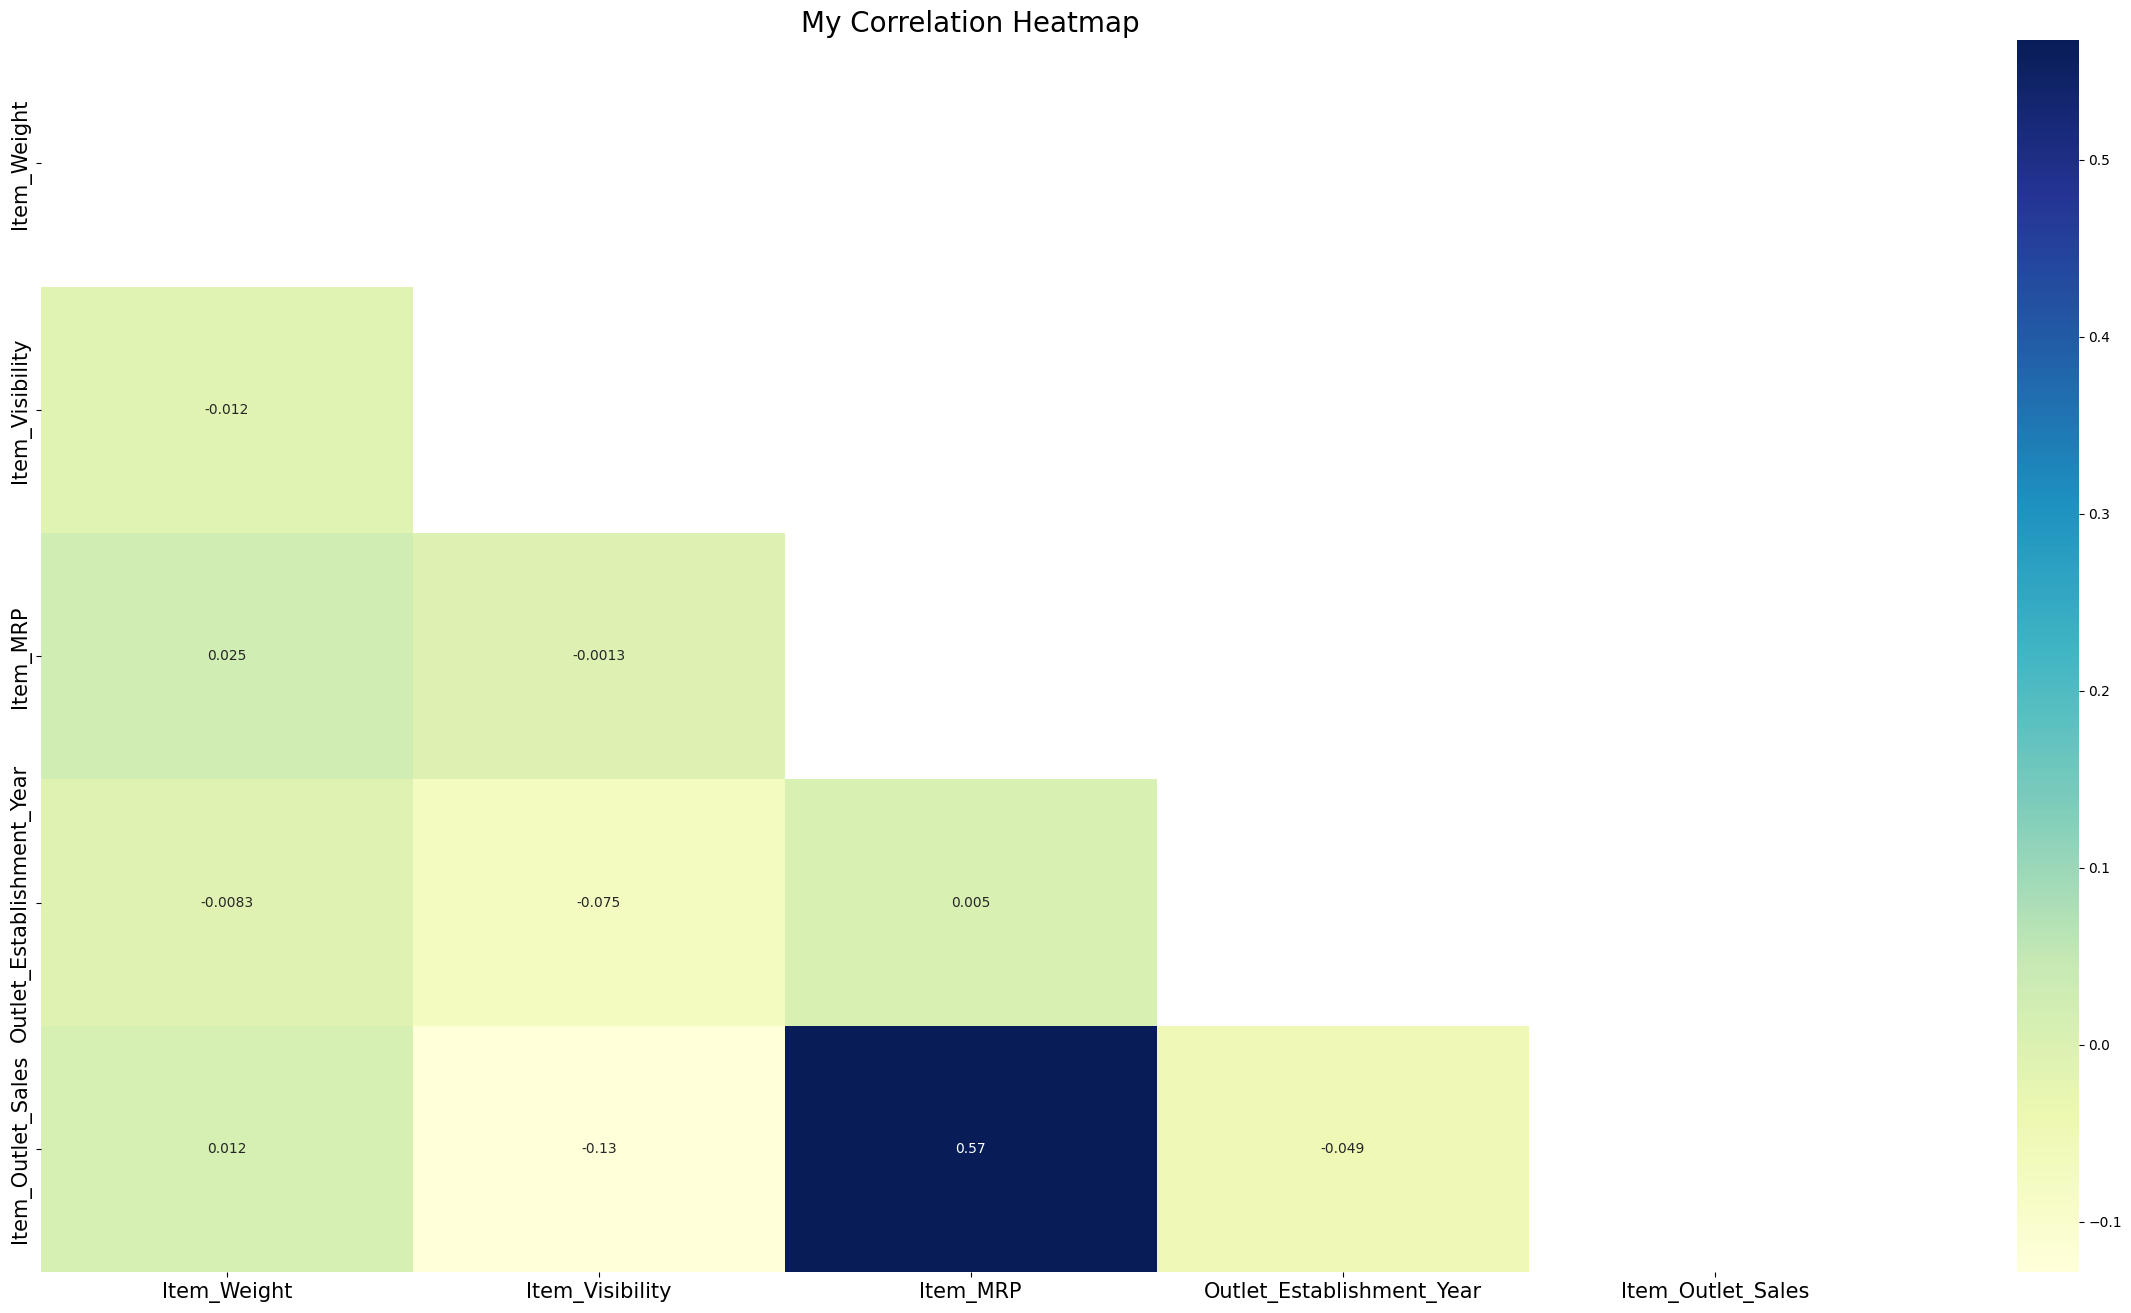

In [9]:
data = 'SampleData/train_big_mart_sales_prediction.csv'
df = pd.read_csv(data)
print('Shape: ', df.shape)

print('\nEXAMPLE: df.inf.info():')
print('='*45 + '\n')
p = [0.5, 0.75, 0.90, 0.95, 0.99]
df.inf.info(percentiles=p)

# Data includes missing values. Fill with mean value
print('Filling missing values with mean value...')
df = df.inf.fillna_numeric_cols_with_value(type='mean')
df.inf.info(percentiles=p)

print('\nEXAMPLE: df.inf.info() with features:')
print('='*45 + '\n')
df.inf.info(['Item_Type', 'Item_Fat_Content'])

print('\nEXAMPLE: df.inf.inspect():')
print('='*45 + '\n')
df.inf.inspect()

print('\nEXAMPLE: df.inf.inspect_outliers():')
print('='*45 + '\n')
df.inf.inspect_outliers(contamination=0.005)

print('\nEXAMPLE: df.inf.plot_corr_heatmap():')
print('='*45 + '\n')
df.inf.plot_corr_heatmap('My Correlation Heatmap')
